In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

### Dataset Description

        1. Age: age in years
        
        2. sex: sex (1 = male; 0 = female)
        
        3.Chest pain type:
            -typical angina
            -atypical angina
            -non-anginal pain
            -asymptomatic
            
        4.Bp: blood preaseure 
        
        5.Cholesterol: serum cholestoral in mg/dl
        
        6.fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
        
        7.EKG results :  displays resting electrocardiographic results
                0 = normal
                1 = having ST-T wave abnormality
                2 = left ventricular hyperthrophy
        
        8.Max HR :Heart reate
        
        9.Exercise angina :exercise induced angina (1 = yes; 0 = no)(pain in chest that comes with exercise)
        
        10.ST depression : ST depression is a term that refers to the position of the ST segment in a person’s ECG results.
        
        11.Slope of ST  :the slope of the peak exercise ST segment
                          -- Value 1: upsloping
                          -- Value 2: flat
                          -- Value 3: downsloping
                          
        12.Number of vessels fluro :number of major vessels (0-3) colored by flourosopy
        
        13.Thallium :displays the thalassemia :
                            3 = normal
                            6 = fixed defect
                            7 = reversible defect

In [2]:
dataset=pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
dataset['Sex']=dataset['Sex'].map({0:'male',1:'Female'})
dataset['Chest pain type']=dataset['Chest pain type'].map({1:'typical angina',2:'atypical angina',3:'non-anginal pain',4:'asymptomatic'})
dataset['EKG results']=dataset['EKG results'].map({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hyperthrophy'})
dataset['FBS over 120']=dataset['FBS over 120'].map({0:'flase',1:'True'})
dataset['Exercise angina']=dataset['Exercise angina'].map({0:'no',1:'yes'})
dataset['Slope of ST']=dataset['Slope of ST'].map({1:'upsloping',2:'flat',3:'downsloping'})
dataset['Thallium']=dataset['Thallium'].map({3:'normal',6:'fixed defect',7:'reversible defect'})

In [5]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,Female,asymptomatic,130,322,flase,left ventricular hyperthrophy,109,no,2.4,flat,3,normal,Presence
1,67,male,non-anginal pain,115,564,flase,left ventricular hyperthrophy,160,no,1.6,flat,0,reversible defect,Absence
2,57,Female,atypical angina,124,261,flase,normal,141,no,0.3,upsloping,0,reversible defect,Presence
3,64,Female,asymptomatic,128,263,flase,normal,105,yes,0.2,flat,1,reversible defect,Absence
4,74,male,atypical angina,120,269,flase,left ventricular hyperthrophy,121,yes,0.2,upsloping,1,normal,Absence


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    object 
 2   Chest pain type          270 non-null    object 
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    object 
 6   EKG results              270 non-null    object 
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    object 
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    object 
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    object 
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(5), o

In [7]:
dataset=dataset.rename(columns={'Chest pain type':'chest_pain_type','FBS over 120':'FBS_over_120','EKG results':'EKG_results',
                       'Max HR':'Max_HR','Exercise angina':'Exercise_angina','ST depression':'ST_depression',
                       'Slope of ST':'Slope_of_ST','Number of vessels fluro':'Number_of_vessels_fluro','Heart Disease':'Heart_Disease'})


In [39]:
#dataset.to_json('heartdisease.json',orient='records')

In [15]:
numerical_columns=[[feature for feature in dataset.columns if dataset[feature].dtypes!='O']]
categorical_columns=[[feature for feature in dataset.columns if dataset[feature].dtypes=='O']]

In [16]:
type(categorical_columns)

list

In [10]:
numerical_columns

['Age',
 'BP',
 'Cholesterol',
 'Max_HR',
 'ST_depression',
 'Number_of_vessels_fluro']

In [11]:
target_column="Heart_Disease"

In [12]:
input_feature_train_df=dataset.drop([target_column],axis=1)

In [13]:
input_feature_train_df

,Age,Sex,chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
0,70,Female,asymptomatic,130,322,flase,left ventricular hyperthrophy,109,no,2.4,flat,3,normal
1,67,male,non-anginal pain,115,564,flase,left ventricular hyperthrophy,160,no,1.6,flat,0,reversible defect
2,57,Female,atypical angina,124,261,flase,normal,141,no,0.3,upsloping,0,reversible defect
3,64,Female,asymptomatic,128,263,flase,normal,105,yes,0.2,flat,1,reversible defect
4,74,male,atypical angina,120,269,flase,left ventricular hyperthrophy,121,yes,0.2,upsloping,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,Female,non-anginal pain,172,199,True,normal,162,no,0.5,upsloping,0,reversible defect
266,44,Female,atypical angina,120,263,flase,normal,173,no,0.0,upsloping,0,reversible defect
267,56,male,atypical angina,140,294,flase,left ventricular hyperthrophy,153,no,1.3,flat,0,normal
268,57,Female,asymptomatic,140,192,flase,normal,148,no,0.4,flat,0,fixed defect


### Finding NULL values

In [8]:
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Observations

No Null values

### Checking Duplicated values 

In [9]:
dataset.duplicated().sum()

0

### Observations

No duplicated values in dataset

### Data visualization

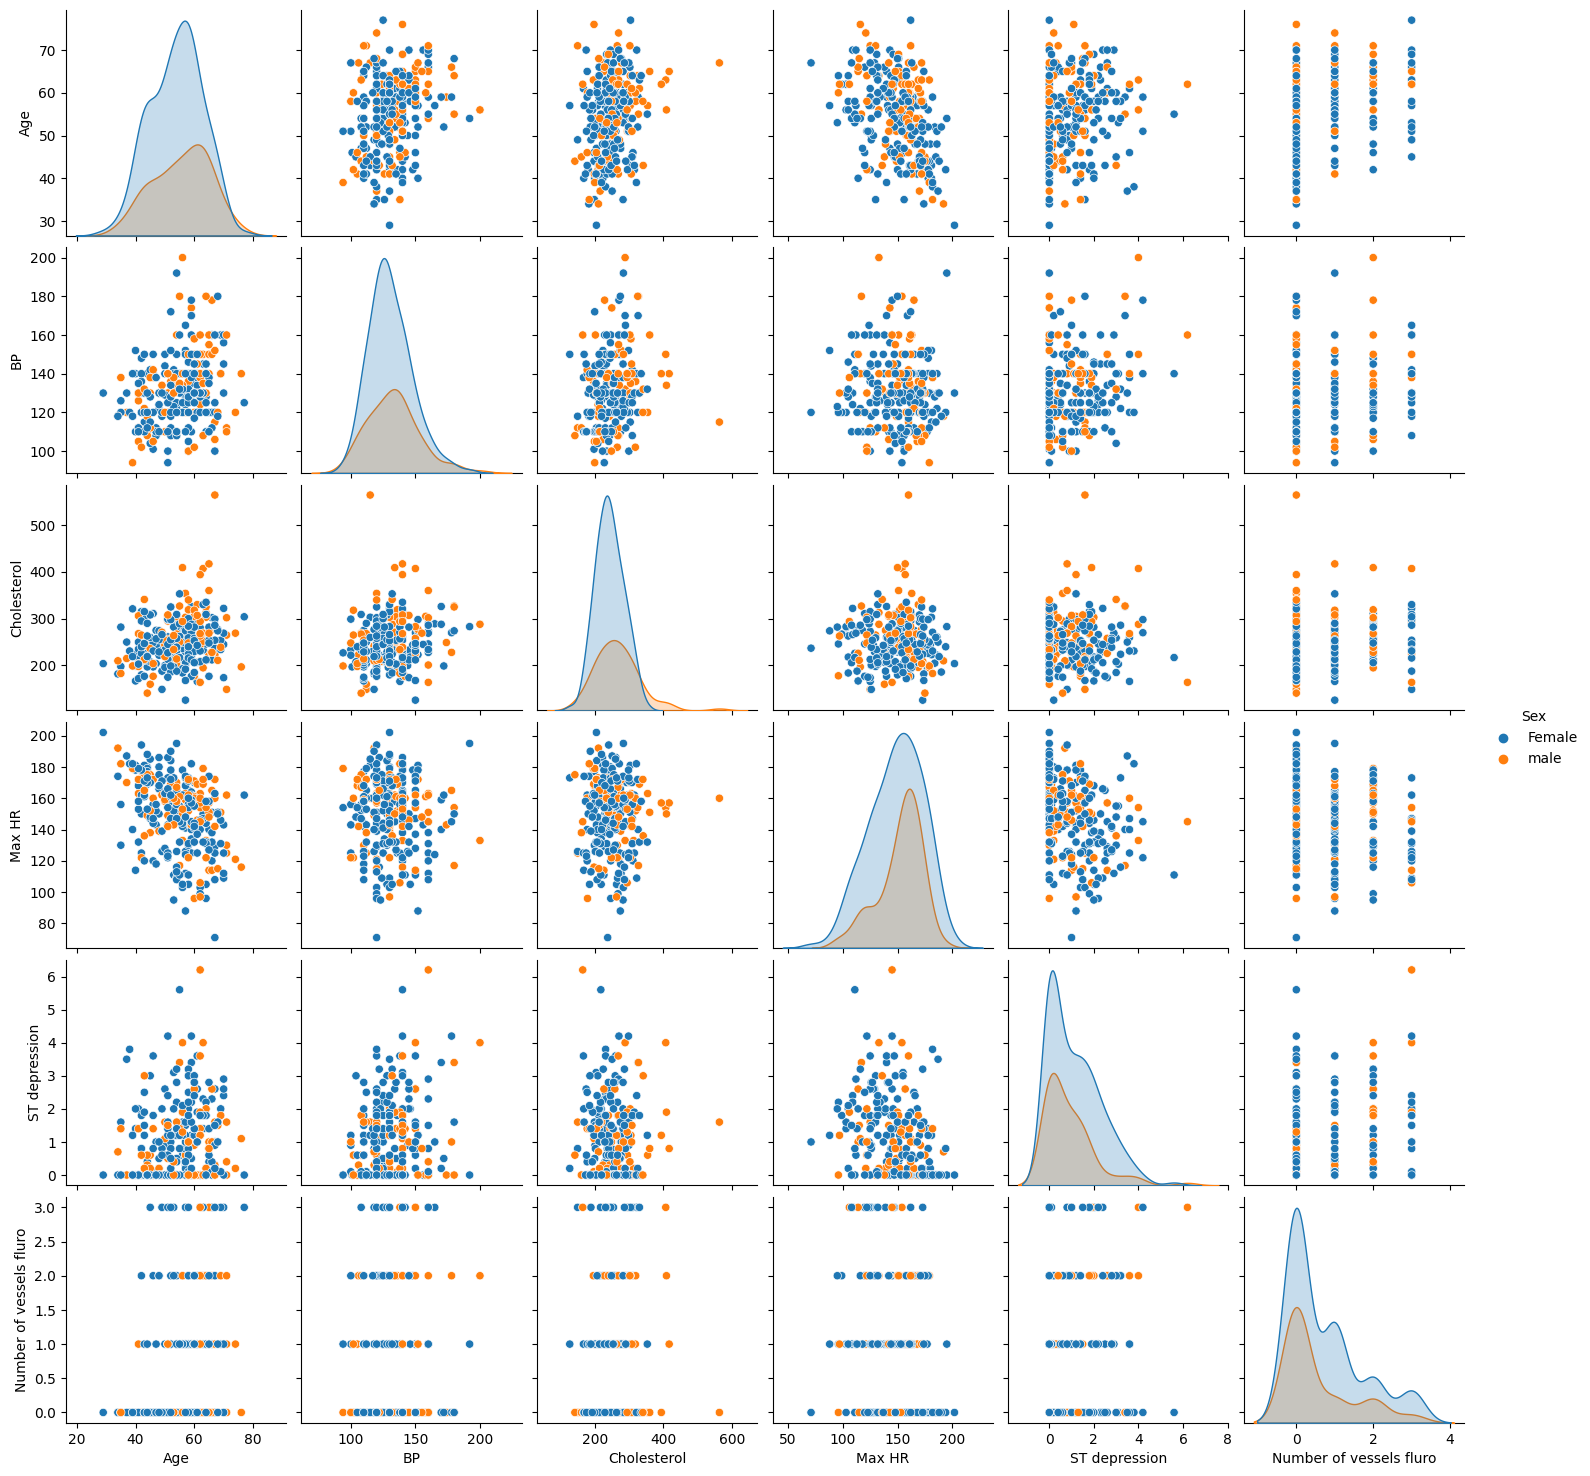

In [10]:
sns.pairplot(dataset,hue='Sex')